In [1]:
import pandas as pd

# Essential libraries
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Set up matplotlib for inline display
%matplotlib inline

# **Data Processing**

In [2]:
df = pd.read_csv('orange_quality_data.csv')
print(df.head())

   size  weight  sweetness   ph  softness  harvest_days  ripeness  \
0   7.5     180       12.0  3.2       2.0            10       4.0   
1   8.2     220       10.5  3.4       3.0            14       4.5   
2   6.8     150       14.0  3.0       1.0             7       5.0   
3   9.0     250        8.5  3.8       4.0            21       3.5   
4   8.5     210       11.5  3.3       2.5            12       5.0   

          color       variety  blemishes  quality  
0        Orange      Valencia          N      4.0  
1   Deep Orange         Navel          N      4.5  
2  Light Orange     Cara Cara          N      5.0  
3    Orange-Red  Blood Orange          N      3.5  
4        Orange        Hamlin  Y (Minor)      4.5  


In [3]:
encoder = preprocessing.OneHotEncoder(sparse=False)
color_encoded = encoder.fit_transform(df[['color']])
df_encoded = pd.DataFrame(color_encoded, columns=encoder.get_feature_names_out(['color']))

# Concatenate the original dataframe with the new one hot encoded dataframe
df_final = pd.concat([df, df_encoded], axis=1).drop('color', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
# Print the list of all column names
print(df_final.columns.tolist())

['size', 'weight', 'sweetness', 'ph', 'softness', 'harvest_days', 'ripeness', 'variety', 'blemishes', 'quality', 'color_Deep Orange', 'color_Light Orange', 'color_Orange', 'color_Orange-Red', 'color_Yellow-Orange']


In [5]:
variety_encoded = encoder.fit_transform(df_final[['variety']])
df_encoded_2 = pd.DataFrame(variety_encoded, columns=encoder.get_feature_names_out(['variety']))

# Concatenate the original dataframe with the new one hot encoded dataframe
df_final_2 = pd.concat([df_final, df_encoded_2], axis=1).drop('variety', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
# Print the list of all column names
print(df_final_2.columns.tolist())

['size', 'weight', 'sweetness', 'ph', 'softness', 'harvest_days', 'ripeness', 'blemishes', 'quality', 'color_Deep Orange', 'color_Light Orange', 'color_Orange', 'color_Orange-Red', 'color_Yellow-Orange', 'variety_Ambiance', 'variety_Blood Orange', 'variety_California Valencia', 'variety_Cara Cara', 'variety_Clementine', 'variety_Clementine (Seedless)', 'variety_Hamlin', 'variety_Honey Tangerine', 'variety_Jaffa', 'variety_Midsweet (Hybrid)', 'variety_Minneola (Hybrid)', 'variety_Moro (Blood)', 'variety_Murcott (Hybrid)', 'variety_Navel', 'variety_Navel (Early Season)', 'variety_Navel (Late Season)', 'variety_Ortanique (Hybrid)', 'variety_Satsuma Mandarin', 'variety_Star Ruby', 'variety_Tangelo (Hybrid)', 'variety_Tangerine', 'variety_Temple', 'variety_Valencia', 'variety_Washington Navel']


In [7]:
blemishes_encoded = encoder.fit_transform(df_final_2[['blemishes']])
df_encoded_3 = pd.DataFrame(blemishes_encoded, columns=encoder.get_feature_names_out(['blemishes']))

# Concatenate the original dataframe with the new one hot encoded dataframe
df_final_3 = pd.concat([df_final_2, df_encoded_3], axis=1).drop('blemishes', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# Print the list of all column names
print(df_final_3.columns.tolist())

['size', 'weight', 'sweetness', 'ph', 'softness', 'harvest_days', 'ripeness', 'quality', 'color_Deep Orange', 'color_Light Orange', 'color_Orange', 'color_Orange-Red', 'color_Yellow-Orange', 'variety_Ambiance', 'variety_Blood Orange', 'variety_California Valencia', 'variety_Cara Cara', 'variety_Clementine', 'variety_Clementine (Seedless)', 'variety_Hamlin', 'variety_Honey Tangerine', 'variety_Jaffa', 'variety_Midsweet (Hybrid)', 'variety_Minneola (Hybrid)', 'variety_Moro (Blood)', 'variety_Murcott (Hybrid)', 'variety_Navel', 'variety_Navel (Early Season)', 'variety_Navel (Late Season)', 'variety_Ortanique (Hybrid)', 'variety_Satsuma Mandarin', 'variety_Star Ruby', 'variety_Tangelo (Hybrid)', 'variety_Tangerine', 'variety_Temple', 'variety_Valencia', 'variety_Washington Navel', 'blemishes_N', 'blemishes_N (Minor)', 'blemishes_N (Split Skin)', 'blemishes_Y (Bruise)', 'blemishes_Y (Bruising)', 'blemishes_Y (Minor Insect Damage)', 'blemishes_Y (Minor)', 'blemishes_Y (Mold Spot)', 'blemishe

In [9]:
# Apply the threshold condition on the output variable "orange quality"
# Oranges with quality rating >= 4 are considered good orange (1)
# Oranges with quality rating < 4 are considered bad orange (0)
df_final_3['quality'] = np.where(df_final_3['quality'] >= 4, 1, 0)

In [10]:
print(df_final_3['quality'].head())

0    1
1    1
2    1
3    0
4    1
Name: quality, dtype: int64


In [11]:
# Extract features and output variables.
y = np.array(df_final_3['quality'])
print(y)
X = df_final_3.drop('quality', axis=1)
print(X.columns.tolist())

[1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1
 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1
 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1]
['size', 'weight', 'sweetness', 'ph', 'softness', 'harvest_days', 'ripeness', 'color_Deep Orange', 'color_Light Orange', 'color_Orange', 'color_Orange-Red', 'color_Yellow-Orange', 'variety_Ambiance', 'variety_Blood Orange', 'variety_California Valencia', 'variety_Cara Cara', 'variety_Clementine', 'variety_Clementine (Seedless)', 'variety_Hamlin', 'variety_Honey Tangerine', 'variety_Jaffa', 'variety_Midsweet (Hybrid)', 'variety_Minneola (Hybrid)', 'variety_Moro (Blood)', 'variety_Murcott (Hybrid)', 'variet

In [12]:
# Split the data set into training set (60%), validation set (20%), and test set (20%).
X_train_df, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.4, random_state=42)
X_val_df, X_test_df, y_val, y_test = train_test_split(X_validation, y_validation, test_size=0.5, random_state=42)

print('X_train:' + str(X_train_df.shape))
print('y_train:' + str(y_train.shape))
print('X_val:' + str(X_val_df.shape))
print('y_val:' + str(y_val.shape))
print('X_test: '  + str(X_test_df.shape))
print('y_test: '  + str(y_test.shape))

X_train:(144, 48)
y_train:(144,)
X_val:(48, 48)
y_val:(48,)
X_test: (49, 48)
y_test: (49,)


In [13]:
# Standardize all the data to the same scale.
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_val = scaler.transform(X_val_df)
X_test = scaler.transform(X_test_df)

# **Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures

**L2 Regularization**

In [15]:
l2_lst = []
l2_lst_train = []
l2_param = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
for i in range(len(l2_param)):
    logreg = LogisticRegression(C=l2_param[i], max_iter=500, penalty="l2", solver="saga").fit(X_train, y_train)
    predictions = logreg.predict(X_train)
    l2_lst_train.append(f1_score(y_train, predictions))
    predictions = logreg.predict(X_val)
    l2_lst.append(f1_score(y_val, predictions))
print(l2_lst_train)
print(l2_lst)

[0.7848101265822784, 0.8910891089108912, 0.9042553191489361, 0.9206349206349206, 0.9304812834224598, 0.9312169312169313, 0.9312169312169313]
[0.8, 0.8378378378378379, 0.8823529411764706, 0.911764705882353, 0.8955223880597014, 0.8615384615384615, 0.8615384615384615]


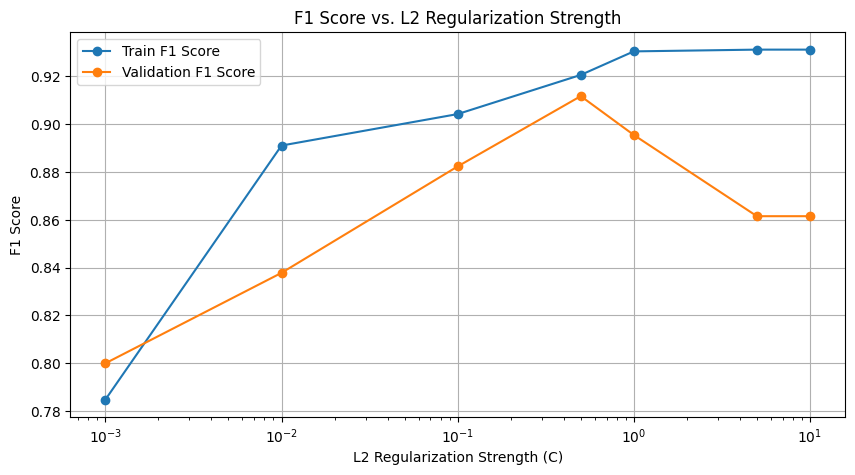

In [16]:
# Plotting the F1 scores against the L2 parameter values
plt.figure(figsize=(10, 5))
plt.plot(l2_param, l2_lst_train, label='Train F1 Score', marker='o')
plt.plot(l2_param, l2_lst, label='Validation F1 Score', marker='o')
plt.xscale('log')
plt.xlabel('L2 Regularization Strength (C)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. L2 Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()

**L1 Regularization**

In [17]:
l1_lst = []
l1_lst_train = []
l1_param = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
for i in range(len(l1_param)):
    logreg = LogisticRegression(C=l1_param[i], max_iter=500, penalty="l1", solver="saga").fit(X_train, y_train)
    predictions = logreg.predict(X_train)
    l1_lst_train.append(f1_score(y_train, predictions))
    predictions = logreg.predict(X_val)
    l1_lst.append(f1_score(y_val, predictions))
print(l1_lst_train)
print(l1_lst)

[0.7848101265822784, 0.7848101265822784, 0.8659793814432989, 0.9042553191489361, 0.925531914893617, 0.9361702127659575, 0.9312169312169313]
[0.8, 0.8, 0.8358208955223881, 0.8615384615384615, 0.8615384615384615, 0.8615384615384615, 0.8615384615384615]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


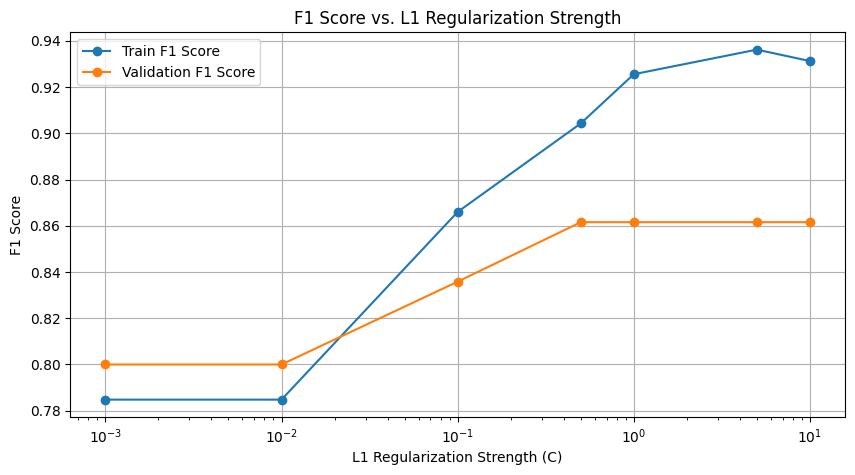

In [18]:
# Plotting the F1 scores against the L1 parameter values
plt.figure(figsize=(10, 5))
plt.plot(l1_param, l1_lst_train, label='Train F1 Score', marker='o')
plt.plot(l1_param, l1_lst, label='Validation F1 Score', marker='o')
plt.xscale('log')
plt.xlabel('L1 Regularization Strength (C)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. L1 Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()

**Threshold**

In [19]:
logreg = LogisticRegression(C=0.5, max_iter=500, penalty="l2", solver="saga").fit(X_train, y_train)
predictions_proba_train = logreg.predict_proba(X_train)
predictions_proba = logreg.predict_proba(X_val)

thres_lst_train = []
thres_lst = []
thres_param = np.arange(0.1, 0.9, 0.05)
for i in thres_param:
    threshold = i  # for example, increase to prioritize precision for the positive class
    custom_predictions = (predictions_proba_train[:, 1] >= threshold).astype(int)
    thres_lst_train.append(f1_score(y_train, custom_predictions))
    custom_predictions = (predictions_proba[:, 1] >= threshold).astype(int)
    thres_lst.append(f1_score(y_val, custom_predictions))

print(thres_lst_train)
print(thres_lst)

[0.8598130841121494, 0.872037914691943, 0.8792270531400967, 0.892156862745098, 0.9054726368159204, 0.9183673469387754, 0.922279792746114, 0.9214659685863874, 0.9206349206349206, 0.9304812834224598, 0.918918918918919, 0.9162011173184358, 0.8901734104046244, 0.8705882352941178, 0.8571428571428571, 0.8466257668711656]
[0.8266666666666667, 0.8378378378378379, 0.8732394366197183, 0.8732394366197183, 0.8857142857142857, 0.8985507246376812, 0.8985507246376812, 0.911764705882353, 0.911764705882353, 0.8787878787878787, 0.8253968253968254, 0.8064516129032259, 0.8135593220338982, 0.8070175438596492, 0.8, 0.7777777777777778]


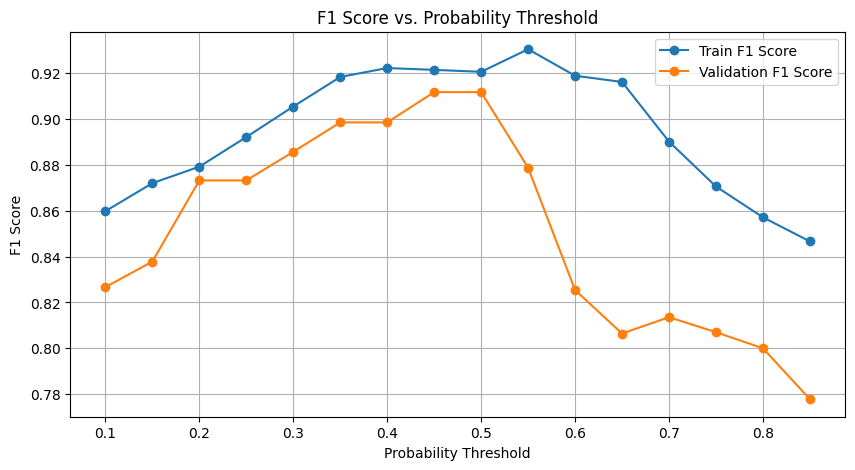

In [20]:
# Plotting the F1 scores against threshold values
plt.figure(figsize=(10, 5))
plt.plot(thres_param, thres_lst_train, label='Train F1 Score', marker='o')
plt.plot(thres_param, thres_lst, label='Validation F1 Score', marker='o')
plt.xlabel('Probability Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Probability Threshold')
plt.legend()
plt.grid(True)
plt.show()

**Feature Transformation: Second Degree Polynomial Transformation**

In [21]:
# Initialize Polynomial Features
poly = PolynomialFeatures(degree=2)

# Fit and Transform
X_train_poly = poly.fit_transform(X_train[:, :7])
X_val_poly = poly.transform(X_val[:, :7])
X_test_poly = poly.transform(X_test[:, :7])

# Concatenate with the original data
X_train_trans = np.concatenate([X_train_poly, X_train[:, 7:]], axis=1)
X_val_trans = np.concatenate([X_val_poly, X_val[:, 7:]], axis=1)
X_test_trans = np.concatenate([X_test_poly, X_test[:, 7:]], axis=1)

In [22]:
# Train the model with second degree polynomial feature transformation.
logreg = LogisticRegression(C=0.5, max_iter=500, penalty="l2", solver="saga").fit(X_train_trans, y_train)
predictions = logreg.predict(X_train_trans)
print(f"Training F1 Score With Feature Transformation: {f1_score(y_train, predictions)}")
predictions = logreg.predict(X_val_trans)
print(f"Validation F1 Score With Feature Transformation: {f1_score(y_val, predictions)}")

Training F1 Score With Feature Transformation: 0.9946524064171123
Validation F1 Score With Feature Transformation: 0.9253731343283582


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
# Train the model without second degree polynomial feature transformation.
logreg = LogisticRegression(C=0.5, max_iter=500, penalty="l2", solver="saga").fit(X_train, y_train)
predictions = logreg.predict(X_train)
print(f"Training F1 Score Without Feature Transformation: {f1_score(y_train, predictions)}")
predictions = logreg.predict(X_val)
print(f"Validation F1 Score Without Feature Transformation: {f1_score(y_val, predictions)}")

Training F1 Score Without Feature Transformation: 0.9206349206349206
Validation F1 Score Without Feature Transformation: 0.911764705882353


**Apply Best Parameter Setting on Test Set**

In [24]:
logreg = LogisticRegression(C=0.5, max_iter=500, penalty="l2", solver="saga").fit(X_train_trans, y_train)
predictions = logreg.predict(X_test_trans)
print(f"Test Set F1 Score: {f1_score(y_test, predictions)}")

Test Set F1 Score: 0.84375


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# **Support Vector Machine**

In [25]:
from sklearn.svm import SVC

**kernel = 'linear'**

In [26]:
c_lst = []
c_lst_train = []
c_param = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for i in c_param:
    model = SVC(kernel='linear', C=i).fit(X_train, y_train)
    predictions = model.predict(X_train)
    c_lst_train.append(f1_score(y_train, predictions))
    predictions = model.predict(X_val)
    c_lst.append(f1_score(y_val, predictions))
print(c_lst_train)
print(c_lst)

[0.7848101265822784, 0.7848101265822784, 0.8994708994708994, 0.9197860962566845, 0.9297297297297297, 0.9368421052631579, 0.9417989417989417, 0.9417989417989417, 0.9417989417989417]
[0.8, 0.8, 0.8611111111111113, 0.8888888888888888, 0.8571428571428571, 0.8852459016393444, 0.870967741935484, 0.870967741935484, 0.870967741935484]


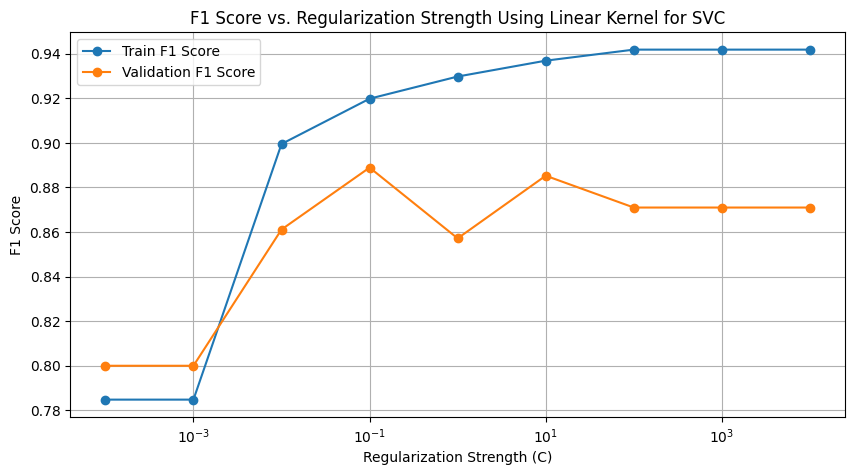

In [27]:
# Plotting the F1 scores against the C parameter values
plt.figure(figsize=(10, 5))
plt.plot(c_param, c_lst_train, label='Train F1 Score', marker='o')
plt.plot(c_param, c_lst, label='Validation F1 Score', marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Regularization Strength Using Linear Kernel for SVC')
plt.legend()
plt.grid(True)
plt.show()

**kernel = 'rbf'**

In [28]:
c_lst = []
c_lst_train = []
c_param = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for i in c_param:
    model = SVC(kernel='rbf', C=i).fit(X_train, y_train)
    predictions = model.predict(X_train)
    c_lst_train.append(f1_score(y_train, predictions))
    predictions = model.predict(X_val)
    c_lst.append(f1_score(y_val, predictions))
print(c_lst_train)
print(c_lst)

[0.7848101265822784, 0.7848101265822784, 0.7848101265822784, 0.7848101265822784, 0.9417989417989417, 1.0, 1.0, 1.0, 1.0]
[0.8, 0.8, 0.8, 0.8, 0.8611111111111113, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706]


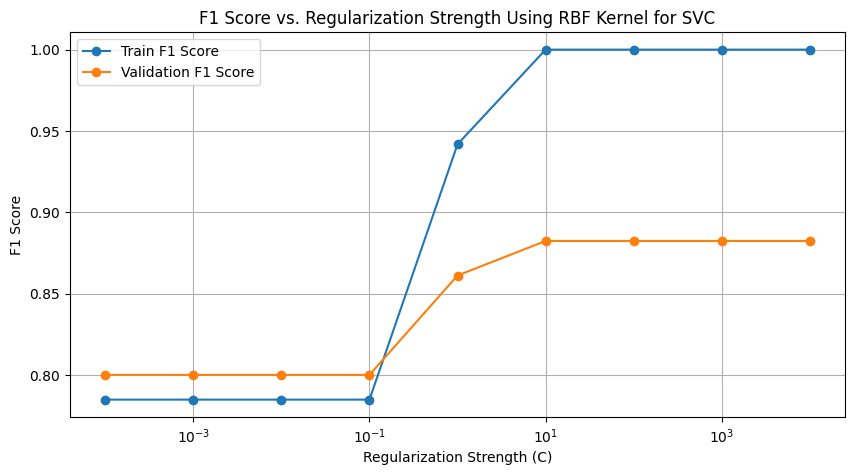

In [29]:
# Plotting the F1 scores against the C parameter values
plt.figure(figsize=(10, 5))
plt.plot(c_param, c_lst_train, label='Train F1 Score', marker='o')
plt.plot(c_param, c_lst, label='Validation F1 Score', marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Regularization Strength Using RBF Kernel for SVC')
plt.legend()
plt.grid(True)
plt.show()

**Apply Best Parameter Setting on Test Set**

In [30]:
model = SVC(kernel='linear', C=0.1).fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Test Set F1 Score: {f1_score(y_test, predictions)}")

Test Set F1 Score: 0.923076923076923


# **Neural Network**

In [31]:
import tensorflow as tf
from tensorflow.python.keras import layers, optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.regularizers import l2
from tensorflow.python.keras.regularizers import l1

**Learning Rate**

In [43]:
learning_lst = []
learning_lst_train = []
learning_param = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.5]
for i in learning_param:
    model = tf.keras.Sequential([
      layers.Dense(128, activation='elu', input_shape=(144,), kernel_regularizer=l2(0.001)),
      layers.Dense(64, activation='elu', kernel_regularizer=l2(0.001)),
      layers.Dense(32, activation='elu', kernel_regularizer=l2(0.001)),
      layers.Dense(16, activation='elu', kernel_regularizer=l2(0.001)),
      layers.Dense(8, activation='elu', kernel_regularizer=l2(0.001)),
      layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)),
    ])

    # Compile the model
    model.compile(optimizer = tf.optimizers.Adam(learning_rate=i),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32)
    predictions = model.predict(X_train)
    predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
    learning_lst_train.append(f1_score(y_train, predicted_classes))
    predictions = model.predict(X_val)
    predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
    learning_lst.append(f1_score(y_val, predicted_classes))

print(learning_lst_train)
print(learning_lst)

Epoch 1/5
5/5 [==============================] - 2s 5ms/step - loss: 0.6678 - accuracy: 0.6181
Epoch 2/5
5/5 [==============================] - 0s 7ms/step - loss: 0.6427 - accuracy: 0.6458
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 0.6219 - accuracy: 0.6736
Epoch 4/5
5/5 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.6806
Epoch 5/5
2/2 [==============================] - 0s 6ms/step
Epoch 1/5
5/5 [==============================] - 1s 4ms/step - loss: 0.7151 - accuracy: 0.5278
Epoch 2/5
5/5 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7708
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 0.4344 - accuracy: 0.8264
Epoch 4/5
5/5 [==============================] - 0s 4ms/step - loss: 0.3662 - accuracy: 0.8611
Epoch 5/5
2/2 [==============================] - 0s 6ms/step
Epoch 1/5
5/5 [==============================] - 1s 5ms/step - loss: 0.5296 - accuracy: 0.7431
Epoch 2/5
5/5 [========

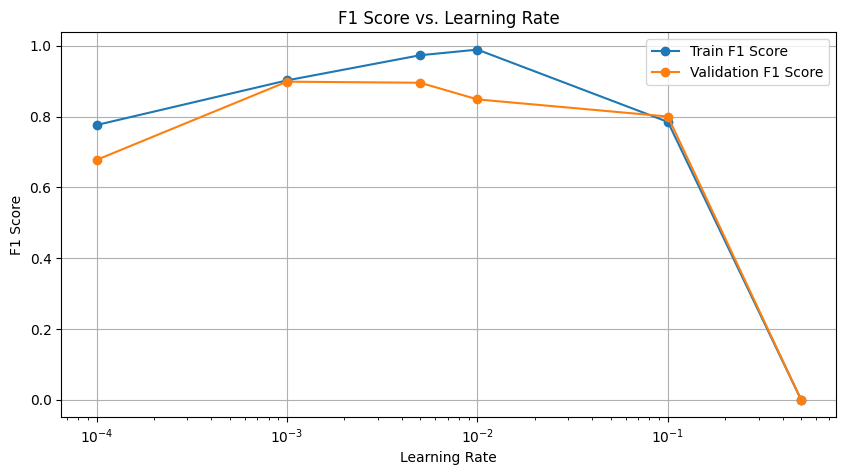

In [44]:
# Plotting the F1 scores against learning rates
plt.figure(figsize=(10, 5))
plt.plot(learning_param, learning_lst_train, label='Train F1 Score', marker='o')
plt.plot(learning_param, learning_lst, label='Validation F1 Score', marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

**L2 Regularization**

In [45]:
l2_lst = []
l2_lst_train = []
l2_param = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.5]
for i in l2_param:
    model = tf.keras.Sequential([
      layers.Dense(128, activation='elu', input_shape=(144,), kernel_regularizer=l2(i)),
      layers.Dense(64, activation='elu', kernel_regularizer=l2(i)),
      layers.Dense(32, activation='elu', kernel_regularizer=l2(i)),
      layers.Dense(16, activation='elu', kernel_regularizer=l2(i)),
      layers.Dense(8, activation='elu', kernel_regularizer=l2(i)),
      layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(i)),
    ])

    # Compile the model
    model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32)
    predictions = model.predict(X_train)
    predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
    l2_lst_train.append(f1_score(y_train, predicted_classes))
    predictions = model.predict(X_val)
    predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
    l2_lst.append(f1_score(y_val, predicted_classes))

print(l2_lst_train)
print(l2_lst)

Epoch 1/5
5/5 [==============================] - 2s 8ms/step - loss: 0.7156 - accuracy: 0.5417
Epoch 2/5
5/5 [==============================] - 0s 7ms/step - loss: 0.4902 - accuracy: 0.8194
Epoch 3/5
5/5 [==============================] - 0s 9ms/step - loss: 0.3942 - accuracy: 0.8472
Epoch 4/5
5/5 [==============================] - 0s 8ms/step - loss: 0.3429 - accuracy: 0.8681
Epoch 5/5
2/2 [==============================] - 0s 9ms/step
Epoch 1/5
5/5 [==============================] - 2s 6ms/step - loss: 0.7500 - accuracy: 0.5417
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 0.4868 - accuracy: 0.8125
Epoch 3/5
5/5 [==============================] - 0s 6ms/step - loss: 0.3880 - accuracy: 0.8681
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 0.3321 - accuracy: 0.8889
Epoch 5/5
2/2 [==============================] - 0s 7ms/step
Epoch 1/5
5/5 [==============================] - 1s 5ms/step - loss: 0.6473 - accuracy: 0.6111
Epoch 2/5
5/5 [========

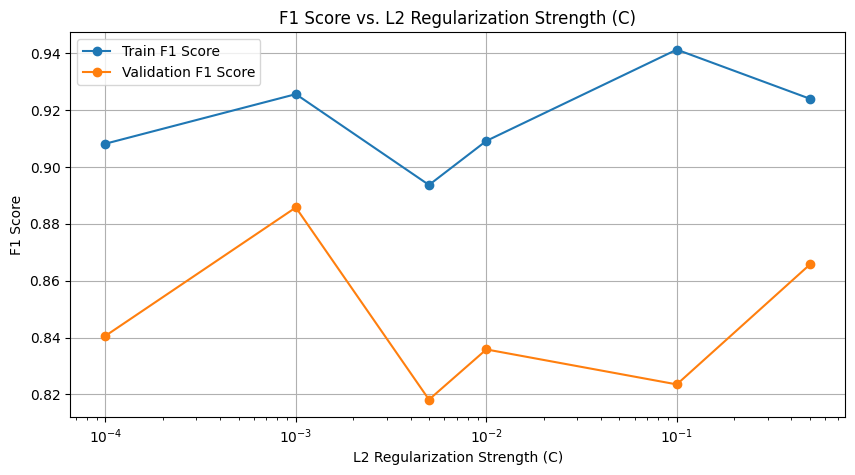

In [46]:
# Plotting the F1 scores against L2 Regularization Strength (C)
plt.figure(figsize=(10, 5))
plt.plot(l2_param, l2_lst_train, label='Train F1 Score', marker='o')
plt.plot(l2_param, l2_lst, label='Validation F1 Score', marker='o')
plt.xscale('log')
plt.xlabel('L2 Regularization Strength (C)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. L2 Regularization Strength (C)')
plt.legend()
plt.grid(True)
plt.show()

**L1 Regularization**

In [47]:
l1_lst = []
l1_lst_train = []
l1_param = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.5]
for i in l1_param:
    model = tf.keras.Sequential([
      layers.Dense(128, activation='elu', input_shape=(144,), kernel_regularizer=l1(i)),
      layers.Dense(64, activation='elu', kernel_regularizer=l1(i)),
      layers.Dense(32, activation='elu', kernel_regularizer=l1(i)),
      layers.Dense(16, activation='elu', kernel_regularizer=l1(i)),
      layers.Dense(8, activation='elu', kernel_regularizer=l1(i)),
      layers.Dense(1, activation='sigmoid', kernel_regularizer=l1(i)),
    ])

    # Compile the model
    model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32)
    predictions = model.predict(X_train)
    predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
    l1_lst_train.append(f1_score(y_train, predicted_classes))
    predictions = model.predict(X_val)
    predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
    l1_lst.append(f1_score(y_val, predicted_classes))

print(l1_lst_train)
print(l1_lst)

Epoch 1/5
5/5 [==============================] - 2s 6ms/step - loss: 0.7068 - accuracy: 0.5694
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 0.4939 - accuracy: 0.8194
Epoch 3/5
5/5 [==============================] - 0s 6ms/step - loss: 0.4044 - accuracy: 0.8264
Epoch 4/5
5/5 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 0.8611
Epoch 5/5
2/2 [==============================] - 0s 8ms/step
Epoch 1/5
5/5 [==============================] - 2s 5ms/step - loss: 0.6944 - accuracy: 0.5556
Epoch 2/5
5/5 [==============================] - 0s 4ms/step - loss: 0.5160 - accuracy: 0.7847
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.8264
Epoch 4/5
5/5 [==============================] - 0s 6ms/step - loss: 0.3719 - accuracy: 0.8333
Epoch 5/5
2/2 [==============================] - 0s 6ms/step
Epoch 1/5
5/5 [==============================] - 2s 6ms/step - loss: 0.7348 - accuracy: 0.5764
Epoch 2/5
5/5 [========

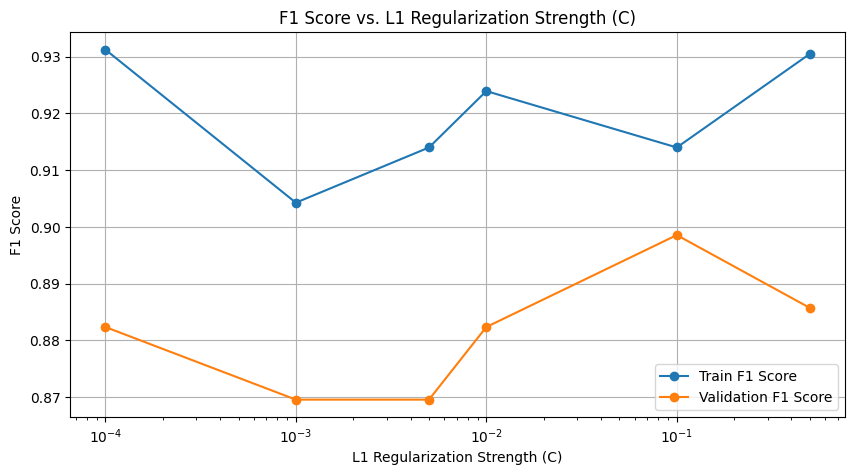

In [48]:
# Plotting the F1 scores against L1 Regularization Strength (C)
plt.figure(figsize=(10, 5))
plt.plot(l1_param, l1_lst_train, label='Train F1 Score', marker='o')
plt.plot(l1_param, l1_lst, label='Validation F1 Score', marker='o')
plt.xscale('log')
plt.xlabel('L1 Regularization Strength (C)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. L1 Regularization Strength (C)')
plt.legend()
plt.grid(True)
plt.show()

**Feature Transformation: Second Degree Polynomial Transformation**

In [51]:
model = tf.keras.Sequential([
  layers.Dense(128, activation='elu', input_shape=(144,), kernel_regularizer=l1(0.1)),
  layers.Dense(64, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(32, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(16, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(8, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(1, activation='sigmoid', kernel_regularizer=l1(0.1)),
])

# Compile the model
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with second degree polynomial transformation
model.fit(X_train_trans, y_train, epochs=5, batch_size=32)
predictions = model.predict(X_train_trans)
predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
print(f"Training F1 Score With Feature Transformation: {f1_score(y_train, predicted_classes)}")
predictions = model.predict(X_val_trans)
predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
print(f"Validation F1 Score With Feature Transformation: {f1_score(y_val, predicted_classes)}")

Epoch 1/5
5/5 [==============================] - 2s 5ms/step - loss: 0.7444 - accuracy: 0.4583
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 0.5902 - accuracy: 0.7014
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 0.5014 - accuracy: 0.8611
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 0.4218 - accuracy: 0.9028
Epoch 5/5
5/5 [==============================] - 0s 5ms/step
Training F1 Score With Feature Transformation: 0.9304812834224598
2/2 [==============================] - 0s 7ms/step
Validation F1 Score With Feature Transformation: 0.8169014084507042


In [52]:
model = tf.keras.Sequential([
  layers.Dense(128, activation='elu', input_shape=(144,), kernel_regularizer=l1(0.1)),
  layers.Dense(64, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(32, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(16, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(8, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(1, activation='sigmoid', kernel_regularizer=l1(0.1)),
])

# Compile the model
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model without second degree polynomial transformation
model.fit(X_train, y_train, epochs=5, batch_size=32)
predictions = model.predict(X_train)
predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
print(f"Training F1 Score Without Feature Transformation: {f1_score(y_train, predicted_classes)}")
predictions = model.predict(X_val)
predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
print(f"Validation F1 Score Without Feature Transformation: {f1_score(y_val, predicted_classes)}")

Epoch 1/5
5/5 [==============================] - 2s 9ms/step - loss: 0.6284 - accuracy: 0.6597
Epoch 2/5
5/5 [==============================] - 0s 7ms/step - loss: 0.4134 - accuracy: 0.8264
Epoch 3/5
5/5 [==============================] - 0s 7ms/step - loss: 0.3366 - accuracy: 0.8681
Epoch 4/5
5/5 [==============================] - 0s 6ms/step - loss: 0.2839 - accuracy: 0.8819
Epoch 5/5
5/5 [==============================] - 0s 5ms/step
Training F1 Score Without Feature Transformation: 0.9247311827956989
2/2 [==============================] - 0s 6ms/step
Validation F1 Score Without Feature Transformation: 0.8695652173913043


**Apply Best Parameter Setting on Test Set**

In [53]:
model = tf.keras.Sequential([
  layers.Dense(128, activation='elu', input_shape=(144,), kernel_regularizer=l1(0.1)),
  layers.Dense(64, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(32, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(16, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(8, activation='elu', kernel_regularizer=l1(0.1)),
  layers.Dense(1, activation='sigmoid', kernel_regularizer=l1(0.1)),
])

# Compile the model
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model without second degree polynomial transformation
model.fit(X_train, y_train, epochs=5, batch_size=32)
predictions = model.predict(X_test)
predicted_classes = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to class labels
print(f"Test Set F1 Score: {f1_score(y_test, predicted_classes)}")

Epoch 1/5
5/5 [==============================] - 4s 11ms/step - loss: 0.7375 - accuracy: 0.4583
Epoch 2/5
5/5 [==============================] - 0s 12ms/step - loss: 0.5072 - accuracy: 0.8194
Epoch 3/5
5/5 [==============================] - 0s 12ms/step - loss: 0.4289 - accuracy: 0.8472
Epoch 4/5
5/5 [==============================] - 0s 12ms/step - loss: 0.3769 - accuracy: 0.8542
Epoch 5/5
2/2 [==============================] - 0s 17ms/step
Test Set F1 Score: 0.9253731343283582
